In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX

Fashion_Jewelry - Random Forest - MAE: 587.14, RMSE: 847.40, MAPE: 24.04%
Fashion_Jewelry - Gradient Boosting - MAE: 539.68, RMSE: 706.43, MAPE: 22.07%
Fashion_Jewelry - XGBoost - MAE: 561.14, RMSE: 699.90, MAPE: 24.54%


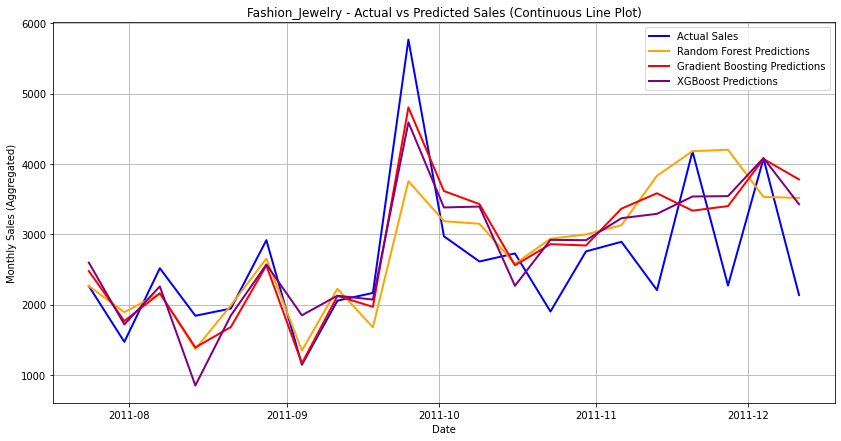

Garden_Outdoor - Random Forest - MAE: 530.52, RMSE: 752.30, MAPE: 26.91%
Garden_Outdoor - Gradient Boosting - MAE: 602.45, RMSE: 807.54, MAPE: 29.55%
Garden_Outdoor - XGBoost - MAE: 546.62, RMSE: 738.46, MAPE: 27.59%


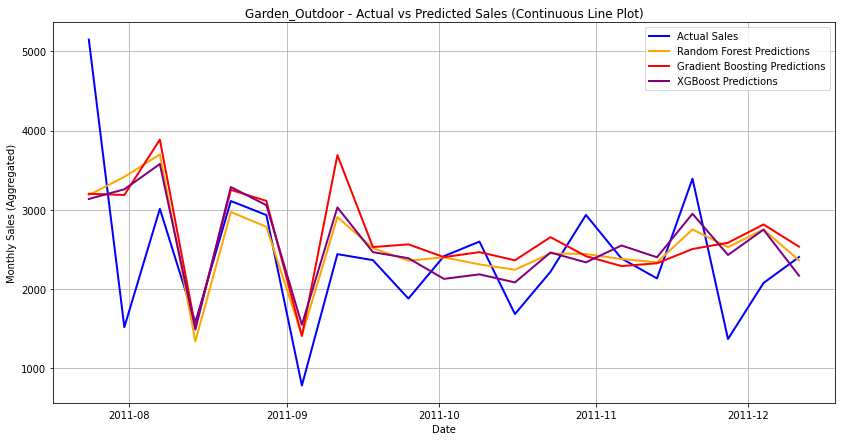

Holiday_Seasonal - Random Forest - MAE: 2269.99, RMSE: 2954.42, MAPE: 13.71%
Holiday_Seasonal - Gradient Boosting - MAE: 2331.31, RMSE: 2933.89, MAPE: 13.65%
Holiday_Seasonal - XGBoost - MAE: 3079.82, RMSE: 3832.27, MAPE: 17.35%


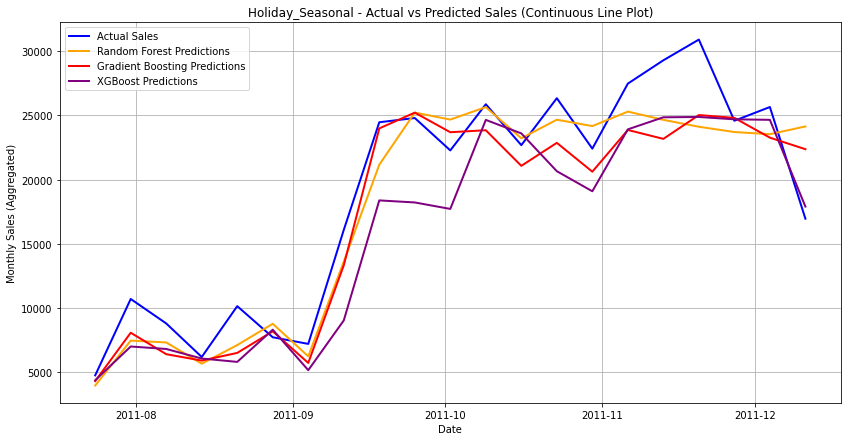

Home_Decor - Random Forest - MAE: 6701.84, RMSE: 8670.72, MAPE: 14.50%
Home_Decor - Gradient Boosting - MAE: 8689.52, RMSE: 10692.30, MAPE: 19.23%
Home_Decor - XGBoost - MAE: 6599.78, RMSE: 8448.62, MAPE: 14.60%


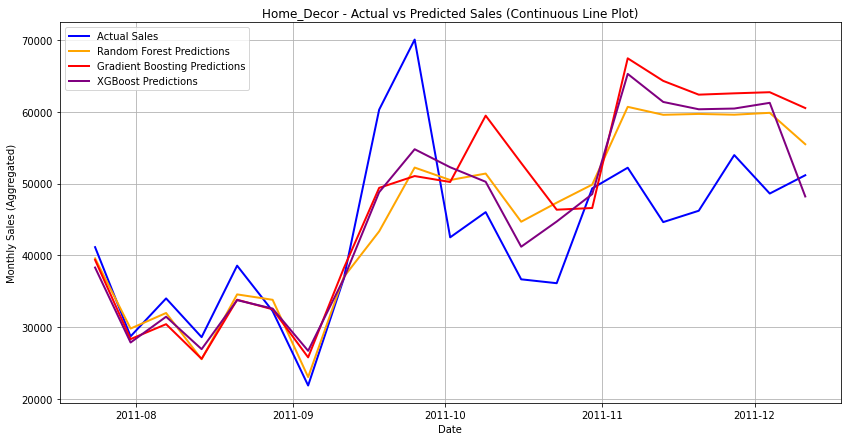

Kids_Toys - Random Forest - MAE: 1053.33, RMSE: 1439.71, MAPE: 16.07%
Kids_Toys - Gradient Boosting - MAE: 1169.46, RMSE: 1638.44, MAPE: 18.54%
Kids_Toys - XGBoost - MAE: 928.96, RMSE: 1452.94, MAPE: 13.30%


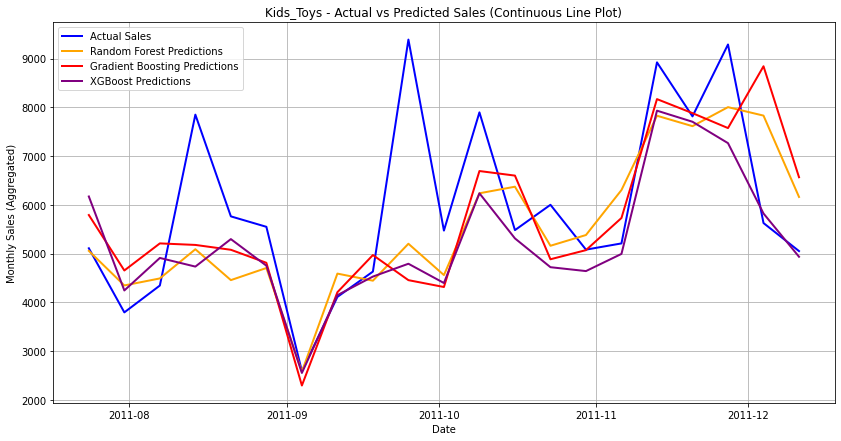

Other - Random Forest - MAE: 6985.15, RMSE: 8424.08, MAPE: 19.69%
Other - Gradient Boosting - MAE: 6420.29, RMSE: 8094.48, MAPE: 18.24%
Other - XGBoost - MAE: 6788.80, RMSE: 8694.68, MAPE: 19.74%


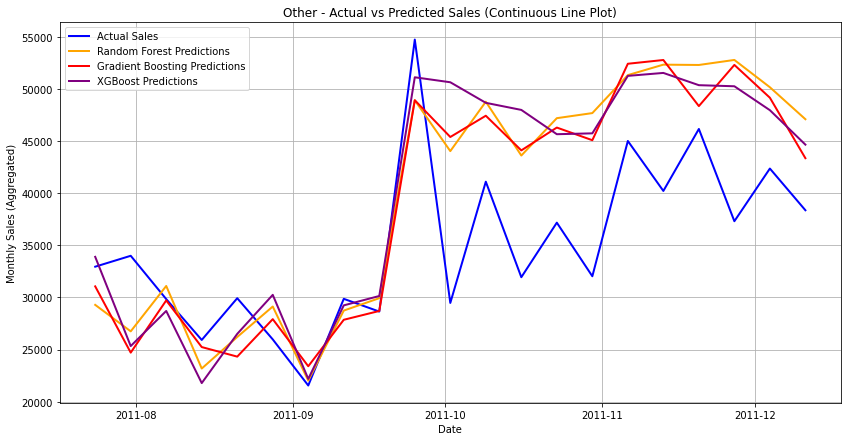

Lighting - Random Forest - MAE: 2187.01, RMSE: 3298.22, MAPE: 29.82%
Lighting - Gradient Boosting - MAE: 1475.06, RMSE: 2124.98, MAPE: 24.19%
Lighting - XGBoost - MAE: 1552.33, RMSE: 2414.54, MAPE: 27.33%


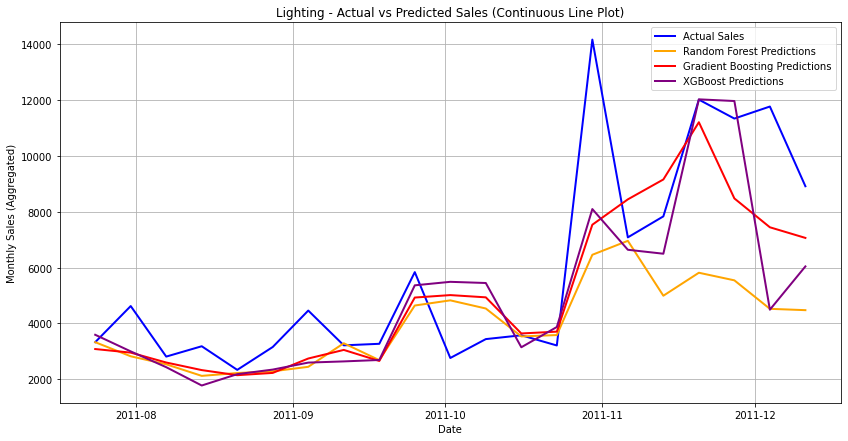

Pet_Supplies - Random Forest - MAE: 624.02, RMSE: 957.21, MAPE: 26.56%
Pet_Supplies - Gradient Boosting - MAE: 855.50, RMSE: 1064.58, MAPE: 35.50%
Pet_Supplies - XGBoost - MAE: 648.49, RMSE: 887.24, MAPE: 30.20%


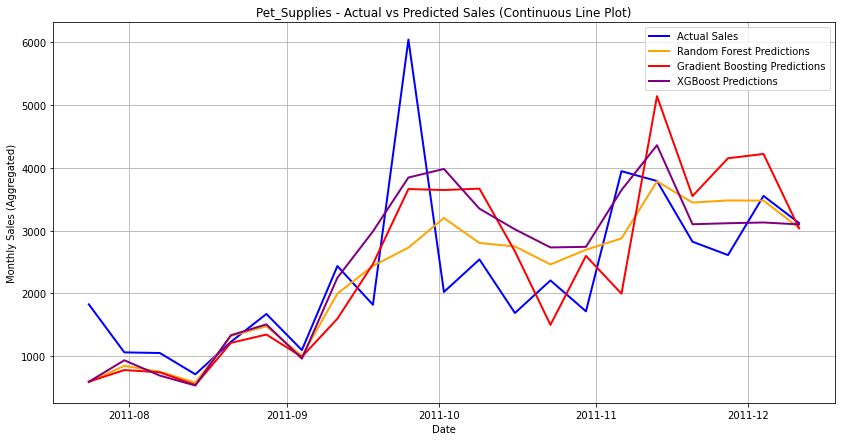

Stationery_Crafts - Random Forest - MAE: 4458.82, RMSE: 5698.50, MAPE: 28.47%
Stationery_Crafts - Gradient Boosting - MAE: 4288.53, RMSE: 5279.36, MAPE: 27.12%
Stationery_Crafts - XGBoost - MAE: 4060.04, RMSE: 4919.86, MAPE: 25.40%


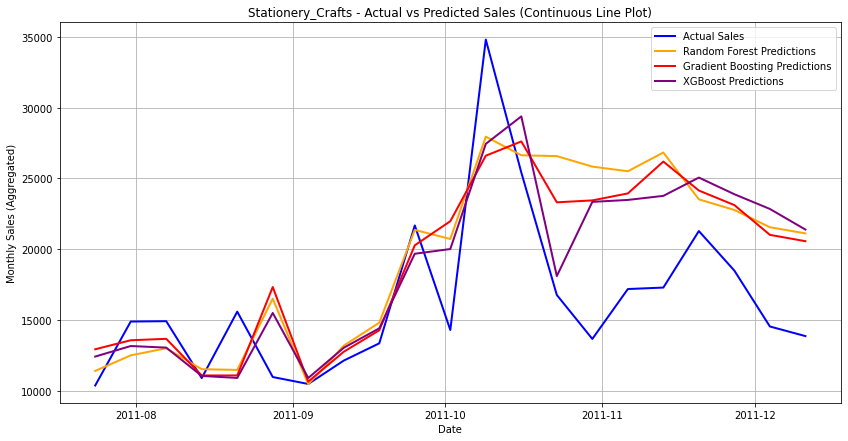

Kitchen_Dining - Random Forest - MAE: 2797.51, RMSE: 3832.14, MAPE: 16.10%
Kitchen_Dining - Gradient Boosting - MAE: 3526.71, RMSE: 4398.68, MAPE: 21.34%
Kitchen_Dining - XGBoost - MAE: 2751.15, RMSE: 3646.39, MAPE: 16.16%


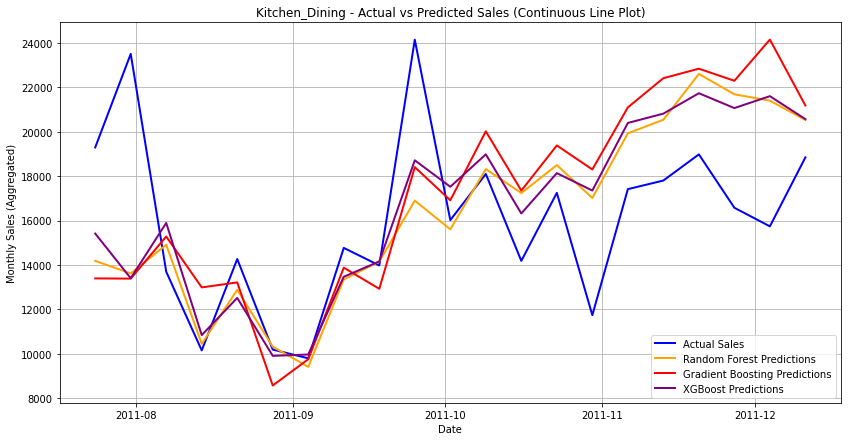

System_Log - Random Forest - MAE: 1314.79, RMSE: 2264.87, MAPE: 62.57%
System_Log - Gradient Boosting - MAE: 1333.59, RMSE: 2231.08, MAPE: 70.68%
System_Log - XGBoost - MAE: 1565.61, RMSE: 2841.93, MAPE: 83.42%


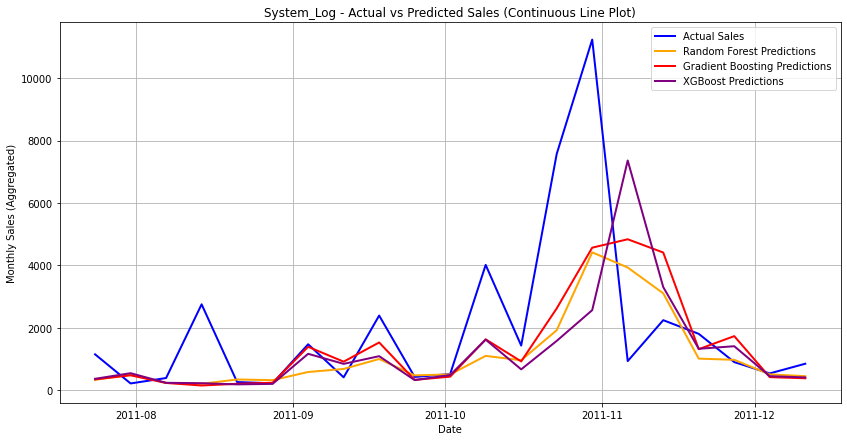

Textiles_Bath - Random Forest - MAE: 1022.12, RMSE: 1269.74, MAPE: 31.16%
Textiles_Bath - Gradient Boosting - MAE: 1464.78, RMSE: 1910.39, MAPE: 43.39%
Textiles_Bath - XGBoost - MAE: 903.03, RMSE: 1473.38, MAPE: 28.95%


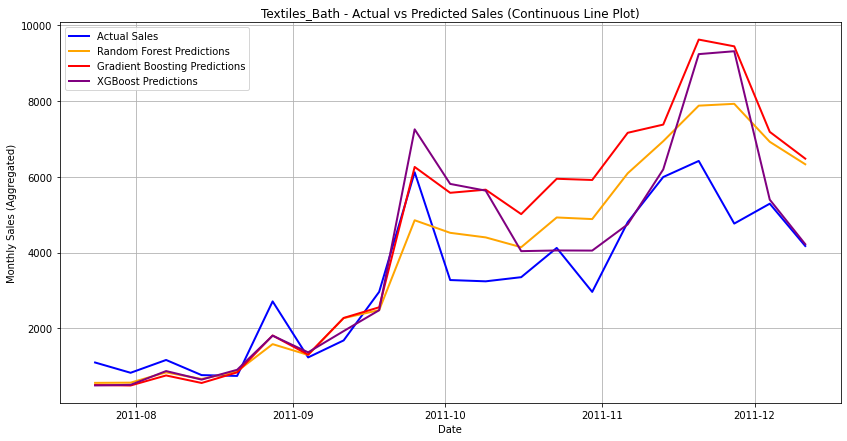

Candy_Food - Random Forest - MAE: 590.47, RMSE: 741.04, MAPE: 15.57%
Candy_Food - Gradient Boosting - MAE: 922.91, RMSE: 1174.48, MAPE: 23.57%
Candy_Food - XGBoost - MAE: 914.37, RMSE: 1263.82, MAPE: 23.69%


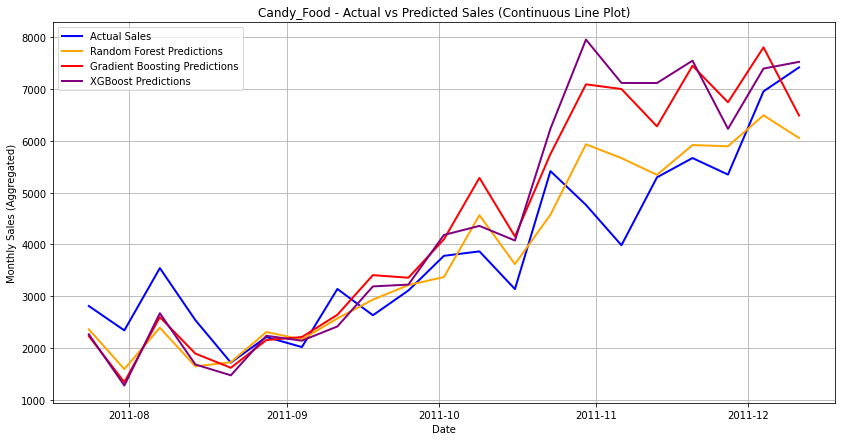

Bags_Accessories - Random Forest - MAE: 3033.25, RMSE: 4145.35, MAPE: 15.48%
Bags_Accessories - Gradient Boosting - MAE: 2959.30, RMSE: 4011.04, MAPE: 15.20%
Bags_Accessories - XGBoost - MAE: 3054.44, RMSE: 3883.67, MAPE: 16.00%


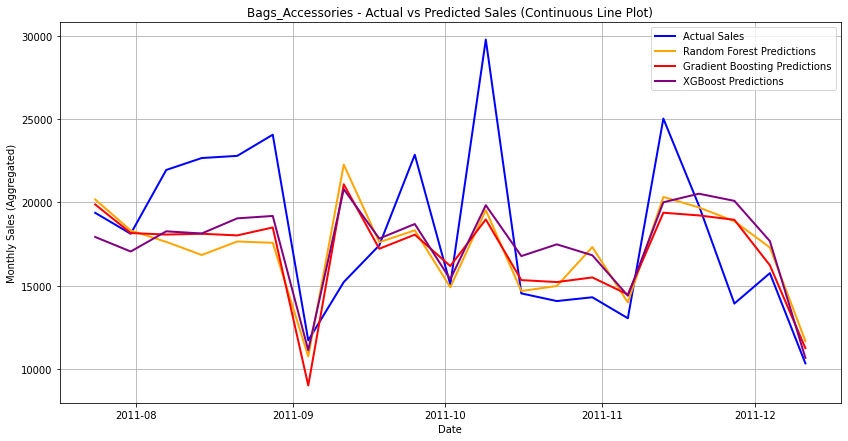

Storage_Organizers - Random Forest - MAE: 3073.35, RMSE: 3339.06, MAPE: 19.25%
Storage_Organizers - Gradient Boosting - MAE: 3171.54, RMSE: 3911.46, MAPE: 19.32%
Storage_Organizers - XGBoost - MAE: 2840.16, RMSE: 3443.23, MAPE: 16.45%


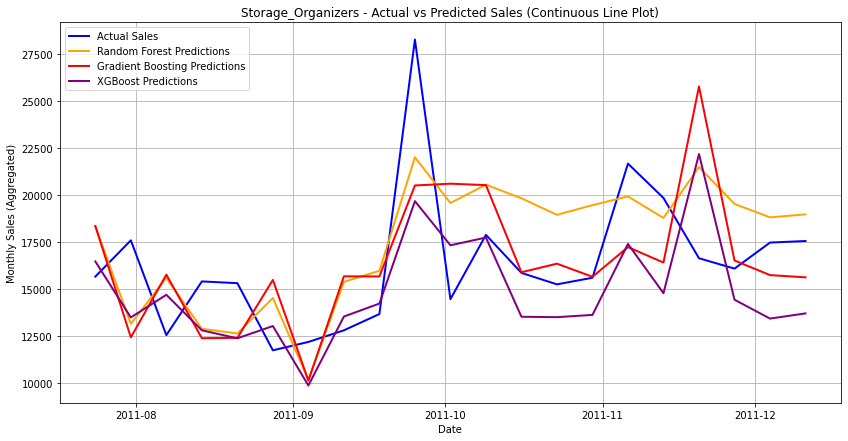

In [26]:
category_files = [
    "Fashion_Jewelry.csv", "Garden_Outdoor.csv", "Holiday_Seasonal.csv", "Home_Decor.csv",
    "Kids_Toys.csv", "Other.csv", "Lighting.csv", "Pet_Supplies.csv", "Stationery_Crafts.csv",
    "Kitchen_Dining.csv", "System_Log.csv", "Textiles_Bath.csv", "Candy_Food.csv",
    "Bags_Accessories.csv", "Storage_Organizers.csv"
]

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(y_true, y_pred, model_name, category_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{category_name} - {model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

for file in category_files:
    category_name = file.split('.')[0]
    df = pd.read_csv(file)
    df.dropna(inplace=True)

    if 'InvoiceDate' in df.columns:
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
        df = df.sort_values('InvoiceDate')
        df['year'] = df['InvoiceDate'].dt.year
        df['month'] = df['InvoiceDate'].dt.month
        df['time_index'] = range(len(df))

    # Aggregate sales by month
    df = df.set_index('InvoiceDate').resample('W').sum().reset_index()

    # Lag features
    df['lag_1'] = df['sales'].shift(1)  # Previous month's sales
    df['lag_2'] = df['sales'].shift(2)
    df['lag_3'] = df['sales'].shift(3)
    
    # Rolling window features
    df['rolling_mean_3'] = df['sales'].rolling(window=3).mean()
    df['rolling_mean_6'] = df['sales'].rolling(window=6).mean()
    df['rolling_std_3'] = df['sales'].rolling(window=3).std()
    df['rolling_std_6'] = df['sales'].rolling(window=6).std()

    df.dropna(inplace=True)  # Drop rows with NaNs from rolling and lag features
    
    # Log transformation
    df['log_sales'] = np.log1p(df['sales'])
    
    # Feature selection
    features = [col for col in df.columns if 'lag' in col or 'rolling' in col or col in ['year', 'month', 'time_index']]
    X = df[features]
    y = df['log_sales']
    
    # Train/test split
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions_log = rf_model.predict(X_test)
    
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_predictions_log = gb_model.predict(X_test)
    
    # XGBoost
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions_log = xgb_model.predict(X_test)
    
    # Convert predictions back to original scale
    rf_predictions = np.expm1(rf_predictions_log)
    gb_predictions = np.expm1(gb_predictions_log)
    xgb_predictions = np.expm1(xgb_predictions_log)
    y_test_original = np.expm1(y_test)
    
    # Evaluation
    evaluate_model(y_test_original, rf_predictions, "Random Forest", category_name)
    evaluate_model(y_test_original, gb_predictions, "Gradient Boosting", category_name)
    evaluate_model(y_test_original, xgb_predictions, "XGBoost", category_name)
    
    # Visualization
    plt.figure(figsize=(14, 7))
    plt.plot(df['InvoiceDate'].iloc[train_size:], y_test_original, label="Actual Sales", color="blue", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], rf_predictions, label="Random Forest Predictions", color="orange", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], gb_predictions, label="Gradient Boosting Predictions", color="red", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], xgb_predictions, label="XGBoost Predictions", color="purple", linewidth=2)
    plt.legend()
    plt.title(f"{category_name} - Actual vs Predicted Sales (Continuous Line Plot)")
    plt.xlabel("Date")
    plt.ylabel("Monthly Sales (Aggregated)")
    plt.grid(True)
    plt.show()


Fashion_Jewelry - Random Forest - MAE: 2993.41, RMSE: 3195.71, MAPE: 39.58%
Fashion_Jewelry - Gradient Boosting - MAE: 3530.27, RMSE: 3665.98, MAPE: 40.89%
Fashion_Jewelry - XGBoost - MAE: 3707.56, RMSE: 4028.13, MAPE: 39.50%


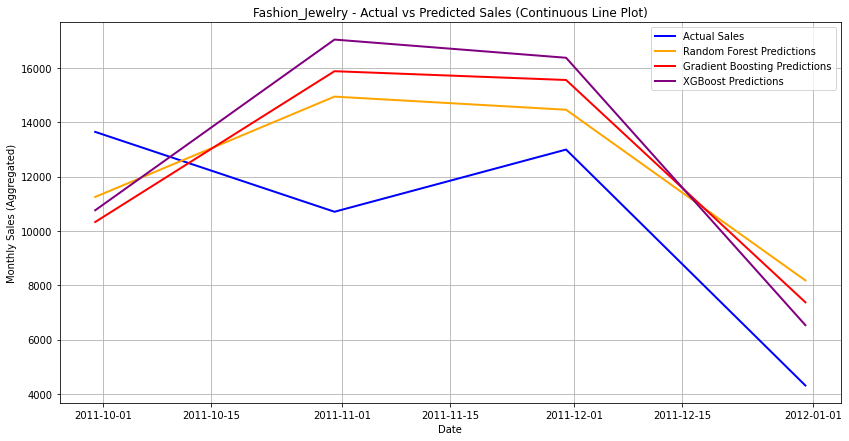

Garden_Outdoor - Random Forest - MAE: 3204.71, RMSE: 3261.62, MAPE: 53.25%
Garden_Outdoor - Gradient Boosting - MAE: 2959.87, RMSE: 3110.61, MAPE: 43.12%
Garden_Outdoor - XGBoost - MAE: 2048.94, RMSE: 2208.73, MAPE: 32.56%


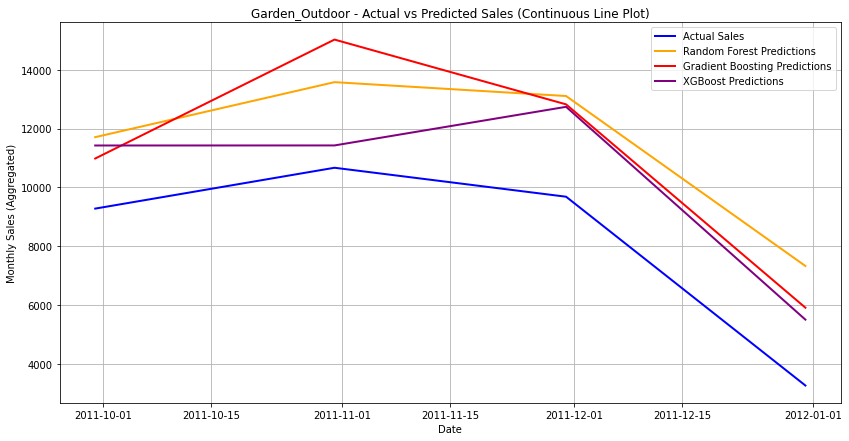

Holiday_Seasonal - Random Forest - MAE: 20542.95, RMSE: 22081.96, MAPE: 30.22%
Holiday_Seasonal - Gradient Boosting - MAE: 10165.20, RMSE: 11302.22, MAPE: 12.82%
Holiday_Seasonal - XGBoost - MAE: 19399.69, RMSE: 20962.46, MAPE: 39.66%


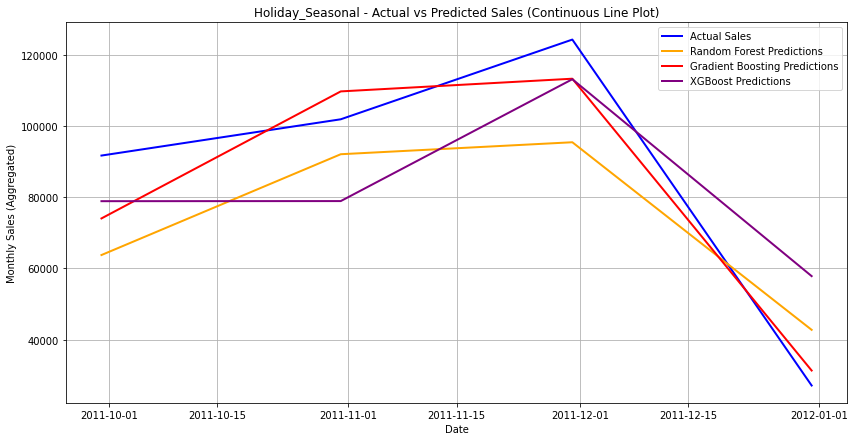

Home_Decor - Random Forest - MAE: 33730.16, RMSE: 41260.57, MAPE: 30.51%
Home_Decor - Gradient Boosting - MAE: 44555.64, RMSE: 46348.76, MAPE: 32.77%
Home_Decor - XGBoost - MAE: 29513.27, RMSE: 37073.44, MAPE: 23.49%


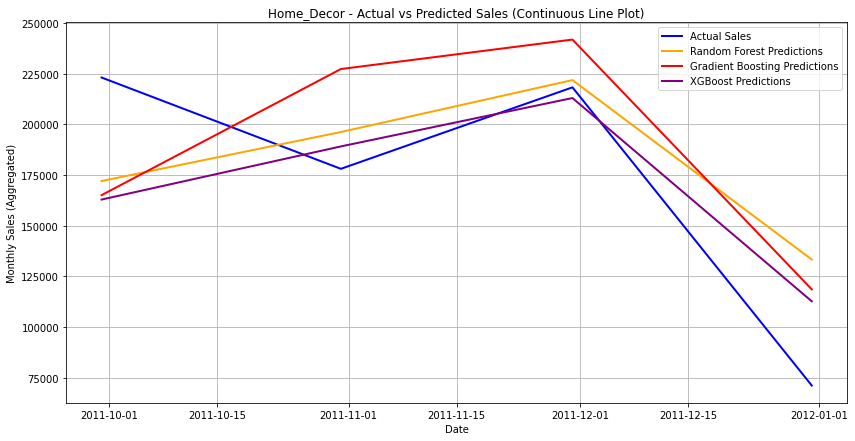

Kids_Toys - Random Forest - MAE: 4016.24, RMSE: 5259.62, MAPE: 34.07%
Kids_Toys - Gradient Boosting - MAE: 3859.67, RMSE: 5179.82, MAPE: 33.37%
Kids_Toys - XGBoost - MAE: 4841.68, RMSE: 5317.80, MAPE: 35.00%


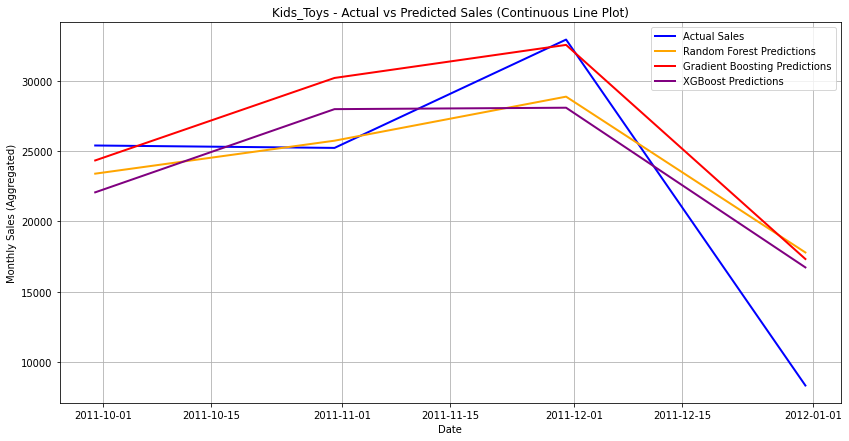

Other - Random Forest - MAE: 23497.54, RMSE: 30104.01, MAPE: 31.00%
Other - Gradient Boosting - MAE: 28368.70, RMSE: 33695.49, MAPE: 30.74%
Other - XGBoost - MAE: 36056.06, RMSE: 37652.23, MAPE: 35.72%


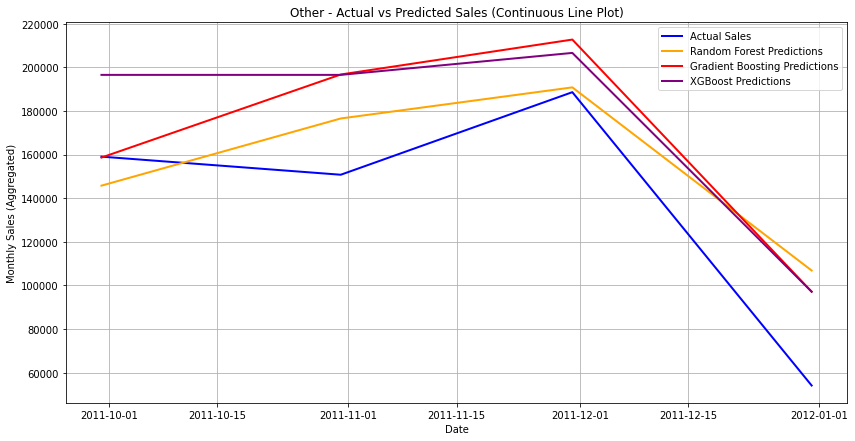

Lighting - Random Forest - MAE: 7817.54, RMSE: 11905.21, MAPE: 23.33%
Lighting - Gradient Boosting - MAE: 6624.37, RMSE: 9604.35, MAPE: 20.47%
Lighting - XGBoost - MAE: 7770.52, RMSE: 12112.75, MAPE: 22.18%


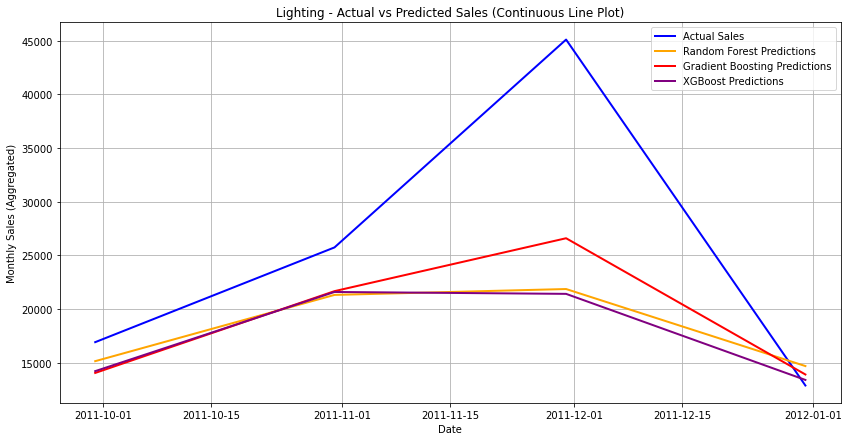

Pet_Supplies - Random Forest - MAE: 3011.27, RMSE: 3629.51, MAPE: 46.27%
Pet_Supplies - Gradient Boosting - MAE: 4435.76, RMSE: 5630.52, MAPE: 73.60%
Pet_Supplies - XGBoost - MAE: 1682.51, RMSE: 2438.69, MAPE: 17.74%


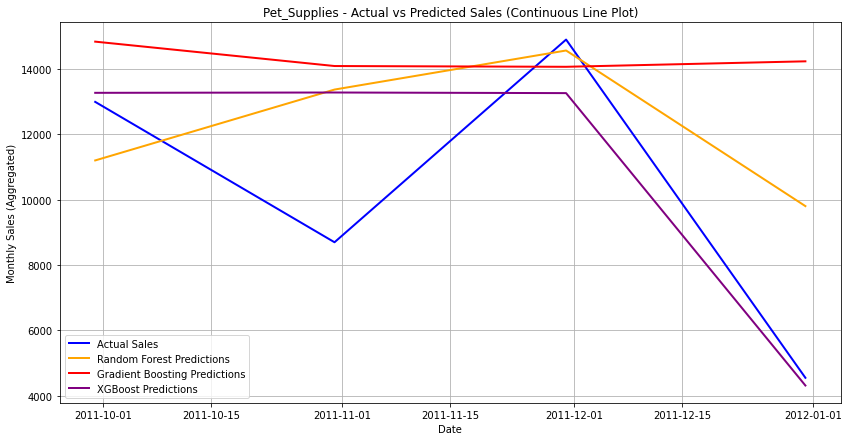

Stationery_Crafts - Random Forest - MAE: 14946.98, RMSE: 16496.76, MAPE: 42.55%
Stationery_Crafts - Gradient Boosting - MAE: 17635.80, RMSE: 19005.93, MAPE: 42.14%
Stationery_Crafts - XGBoost - MAE: 17967.96, RMSE: 18947.13, MAPE: 44.34%


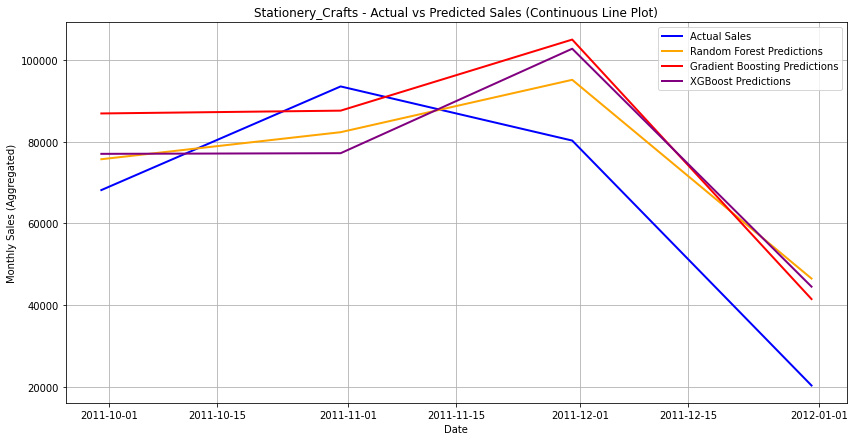

Kitchen_Dining - Random Forest - MAE: 13025.67, RMSE: 16750.10, MAPE: 37.22%
Kitchen_Dining - Gradient Boosting - MAE: 19261.73, RMSE: 22965.78, MAPE: 51.58%
Kitchen_Dining - XGBoost - MAE: 13851.99, RMSE: 18649.43, MAPE: 41.43%


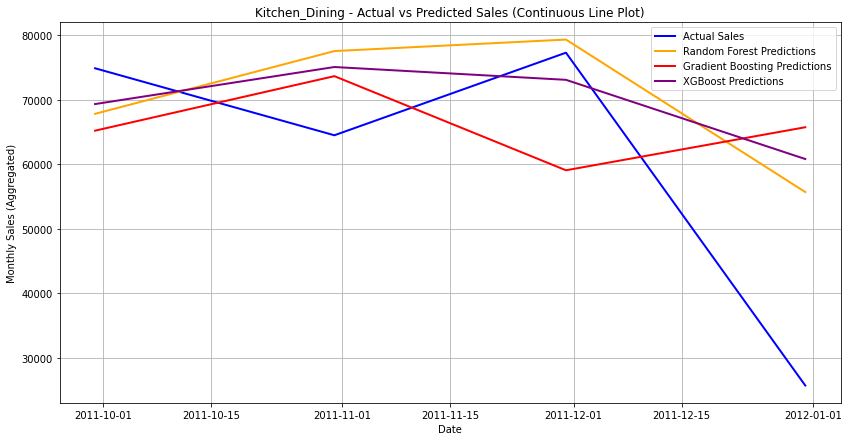

System_Log - Random Forest - MAE: 4510.85, RMSE: 7532.41, MAPE: 58.91%
System_Log - Gradient Boosting - MAE: 5031.73, RMSE: 6774.95, MAPE: 79.40%
System_Log - XGBoost - MAE: 4891.45, RMSE: 6629.10, MAPE: 77.55%


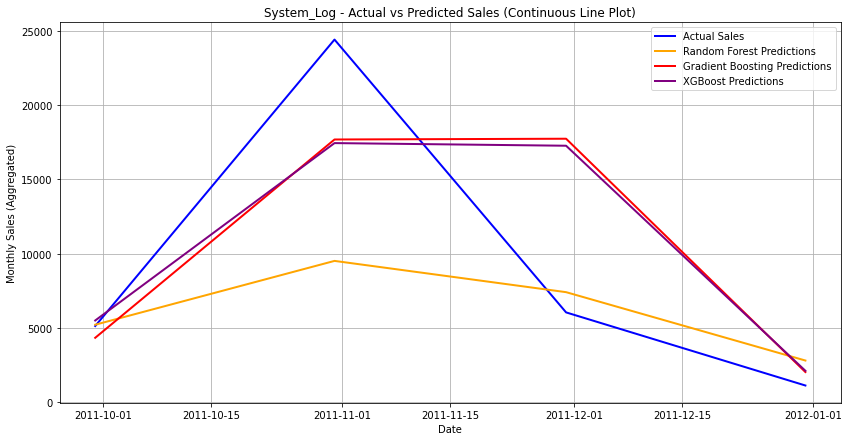

Textiles_Bath - Random Forest - MAE: 2561.80, RMSE: 3065.17, MAPE: 23.71%
Textiles_Bath - Gradient Boosting - MAE: 4523.69, RMSE: 4558.56, MAPE: 34.76%
Textiles_Bath - XGBoost - MAE: 3001.71, RMSE: 3851.95, MAPE: 19.08%


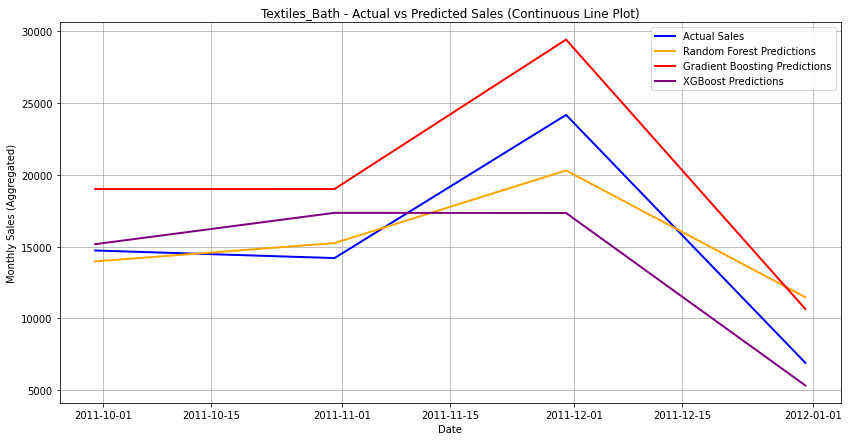

Candy_Food - Random Forest - MAE: 1826.34, RMSE: 2149.11, MAPE: 12.40%
Candy_Food - Gradient Boosting - MAE: 4337.17, RMSE: 5201.00, MAPE: 26.57%
Candy_Food - XGBoost - MAE: 1867.21, RMSE: 2820.71, MAPE: 10.54%


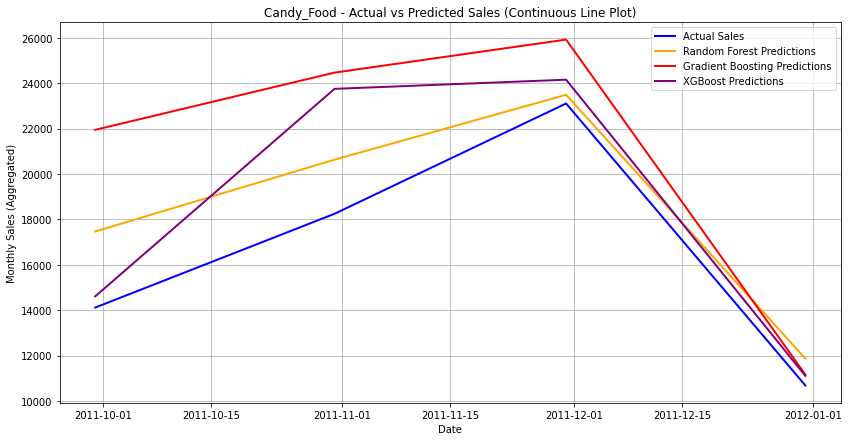

Bags_Accessories - Random Forest - MAE: 9359.01, RMSE: 13264.27, MAPE: 38.53%
Bags_Accessories - Gradient Boosting - MAE: 13506.05, RMSE: 14381.00, MAPE: 36.08%
Bags_Accessories - XGBoost - MAE: 10585.53, RMSE: 11751.77, MAPE: 31.03%


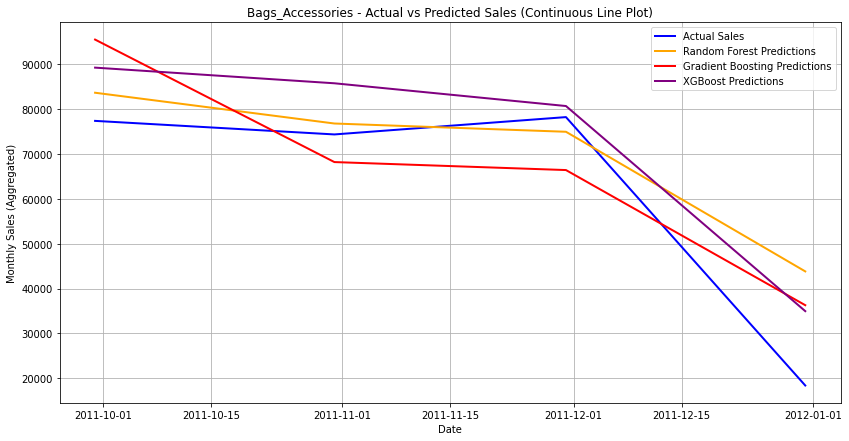

Storage_Organizers - Random Forest - MAE: 18566.09, RMSE: 22167.12, MAPE: 47.71%
Storage_Organizers - Gradient Boosting - MAE: 15704.72, RMSE: 16659.59, MAPE: 29.53%
Storage_Organizers - XGBoost - MAE: 20400.96, RMSE: 23122.10, MAPE: 49.31%


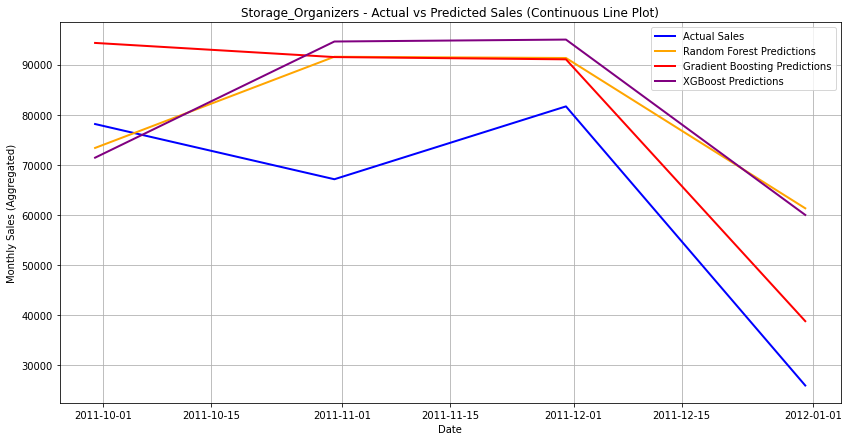

In [28]:
category_files = [
    "Fashion_Jewelry.csv", "Garden_Outdoor.csv", "Holiday_Seasonal.csv", "Home_Decor.csv",
    "Kids_Toys.csv", "Other.csv", "Lighting.csv", "Pet_Supplies.csv", "Stationery_Crafts.csv",
    "Kitchen_Dining.csv", "System_Log.csv", "Textiles_Bath.csv", "Candy_Food.csv",
    "Bags_Accessories.csv", "Storage_Organizers.csv"
]

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(y_true, y_pred, model_name, category_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{category_name} - {model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

for file in category_files:
    category_name = file.split('.')[0]
    df = pd.read_csv(file)
    df.dropna(inplace=True)

    if 'InvoiceDate' in df.columns:
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
        df = df.sort_values('InvoiceDate')
        df['year'] = df['InvoiceDate'].dt.year
        df['month'] = df['InvoiceDate'].dt.month
        df['time_index'] = range(len(df))

    # Aggregate sales by month
    df = df.set_index('InvoiceDate').resample('M').sum().reset_index()

    # Lag features
    df['lag_1'] = df['sales'].shift(1)  # Previous month's sales
    df['lag_2'] = df['sales'].shift(2)
    df['lag_3'] = df['sales'].shift(3)
    
    # Rolling window features
    df['rolling_mean_3'] = df['sales'].rolling(window=3).mean()
    df['rolling_mean_6'] = df['sales'].rolling(window=6).mean()
    df['rolling_std_3'] = df['sales'].rolling(window=3).std()
    df['rolling_std_6'] = df['sales'].rolling(window=6).std()

    df.dropna(inplace=True)  # Drop rows with NaNs from rolling and lag features
    
    # Log transformation
    df['log_sales'] = np.log1p(df['sales'])
    
    # Feature selection
    features = [col for col in df.columns if 'lag' in col or 'rolling' in col or col in ['year', 'month', 'time_index']]
    X = df[features]
    y = df['log_sales']
    
    # Train/test split
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions_log = rf_model.predict(X_test)
    
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_predictions_log = gb_model.predict(X_test)
    
    # XGBoost
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions_log = xgb_model.predict(X_test)
    
    # Convert predictions back to original scale
    rf_predictions = np.expm1(rf_predictions_log)
    gb_predictions = np.expm1(gb_predictions_log)
    xgb_predictions = np.expm1(xgb_predictions_log)
    y_test_original = np.expm1(y_test)
    
    # Evaluation
    evaluate_model(y_test_original, rf_predictions, "Random Forest", category_name)
    evaluate_model(y_test_original, gb_predictions, "Gradient Boosting", category_name)
    evaluate_model(y_test_original, xgb_predictions, "XGBoost", category_name)
    
    # Visualization
    plt.figure(figsize=(14, 7))
    plt.plot(df['InvoiceDate'].iloc[train_size:], y_test_original, label="Actual Sales", color="blue", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], rf_predictions, label="Random Forest Predictions", color="orange", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], gb_predictions, label="Gradient Boosting Predictions", color="red", linewidth=2)
    plt.plot(df['InvoiceDate'].iloc[train_size:], xgb_predictions, label="XGBoost Predictions", color="purple", linewidth=2)
    plt.legend()
    plt.title(f"{category_name} - Actual vs Predicted Sales (Continuous Line Plot)")
    plt.xlabel("Date")
    plt.ylabel("Monthly Sales (Aggregated)")
    plt.grid(True)
    plt.show()


<ipython-input-37-c87188019bb7>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Random Forest - MAE: 247639.10, RMSE: 403058.69
Gradient Boosting - MAE: 280693.30, RMSE: 430900.29
XGBoost - MAE: 307851.64, RMSE: 403757.82


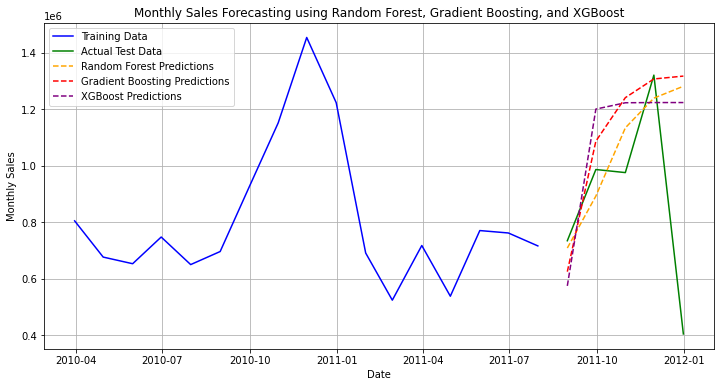

In [37]:
# 1. Load the Original Data
file_path = "filtered_6_months(use later).csv"
df = pd.read_csv(file_path)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)

# Filter out invalid Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['sales'] = df['Quantity'] * df['Price']

# 2. Aggregate sales by month
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('M').sum(numeric_only=True).reset_index()

# 3. Feature Engineering
monthly_sales['year'] = monthly_sales['InvoiceDate'].dt.year
monthly_sales['month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales['time_index'] = np.arange(len(monthly_sales))  # Time index for time-based analysis

# Generate Lag Features and Rolling Statistics
monthly_sales['sales_lag1'] = monthly_sales['sales'].shift(1)
monthly_sales['sales_lag2'] = monthly_sales['sales'].shift(2)
monthly_sales['rolling_mean_3'] = monthly_sales['sales'].rolling(window=3).mean().shift(1)
monthly_sales['rolling_std_3'] = monthly_sales['sales'].rolling(window=3).std().shift(1)

# Log Transformation
monthly_sales['log_sales'] = np.log1p(monthly_sales['sales'])  # log(1 + sales)

# Drop rows with NaN values introduced by lag features and rolling statistics
monthly_sales.dropna(inplace=True)

# 4. Prepare Data for Training
features = ['time_index', 'year', 'month', 'sales_lag1', 'sales_lag2', 'rolling_mean_3', 'rolling_std_3']
X = monthly_sales[features]
y = monthly_sales['log_sales']

# Handle missing values
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

# Train/Test Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Train Models
# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions_log = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions_log = gb_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions_log = xgb_model.predict(X_test)

# Convert log predictions back to the original scale
rf_predictions = np.expm1(rf_predictions_log)
gb_predictions = np.expm1(gb_predictions_log)
xgb_predictions = np.expm1(xgb_predictions_log)
y_test_original = np.expm1(y_test)

# 6. Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate_model(y_test_original, rf_predictions, "Random Forest")
evaluate_model(y_test_original, gb_predictions, "Gradient Boosting")
evaluate_model(y_test_original, xgb_predictions, "XGBoost")

# 7. Visualization: Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'].iloc[:train_size], np.expm1(y_train), label="Training Data", color="blue")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], y_test_original, label="Actual Test Data", color="green")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], rf_predictions, label="Random Forest Predictions", color="orange", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], gb_predictions, label="Gradient Boosting Predictions", color="red", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], xgb_predictions, label="XGBoost Predictions", color="purple", linestyle="dashed")
plt.legend()
plt.title("Monthly Sales Forecasting using Random Forest, Gradient Boosting, and XGBoost")
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.grid(True)
plt.show()


<ipython-input-53-d829a134fef3>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Random Forest - MAE: 247639.10, RMSE: 403058.69, MAPE: 50.63%, Bias: -15.89%
Gradient Boosting - MAE: 280693.30, RMSE: 430900.29, MAPE: 55.99%, Bias: -20.74%
XGBoost - MAE: 307851.64, RMSE: 403757.82, MAPE: 55.91%, Bias: -18.82%


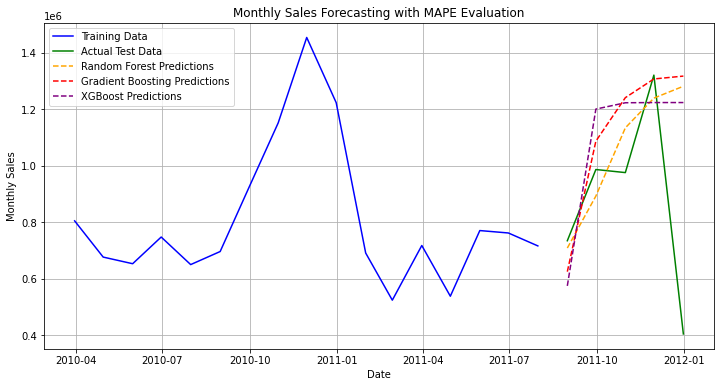

In [53]:
# 1. Load the Original Data
file_path = "filtered_6_months(use later).csv"
df = pd.read_csv(file_path)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)

# Filter out invalid Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['sales'] = df['Quantity'] * df['Price']

# 2. Aggregate sales by month
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('M').sum(numeric_only=True).reset_index()

# 3. Feature Engineering
monthly_sales['year'] = monthly_sales['InvoiceDate'].dt.year
monthly_sales['month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales['time_index'] = np.arange(len(monthly_sales))  # Time index for time-based analysis

# Generate Lag Features and Rolling Statistics
monthly_sales['sales_lag1'] = monthly_sales['sales'].shift(1)
monthly_sales['sales_lag2'] = monthly_sales['sales'].shift(2)
monthly_sales['rolling_mean_3'] = monthly_sales['sales'].rolling(window=3).mean().shift(1)
monthly_sales['rolling_std_3'] = monthly_sales['sales'].rolling(window=3).std().shift(1)

# Log Transformation
monthly_sales['log_sales'] = np.log1p(monthly_sales['sales'])  # log(1 + sales)

# Drop rows with NaN values introduced by lag features and rolling statistics
monthly_sales.dropna(inplace=True)

# 4. Prepare Data for Training
features = ['time_index', 'year', 'month', 'sales_lag1', 'sales_lag2', 'rolling_mean_3', 'rolling_std_3']
X = monthly_sales[features]
y = monthly_sales['log_sales']

# Handle missing values
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

# Train/Test Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Train Models
# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions_log = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions_log = gb_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions_log = xgb_model.predict(X_test)

# Convert log predictions back to the original scale
rf_predictions = np.expm1(rf_predictions_log)
gb_predictions = np.expm1(gb_predictions_log)
xgb_predictions = np.expm1(xgb_predictions_log)
y_test_original = np.expm1(y_test)

# 6. Evaluation Metrics (Including MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def forecast_bias(y_true, y_pred):
    return np.sum(y_true - y_pred) / np.sum(y_pred) * 100

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    bias = forecast_bias(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, Bias: {bias:.2f}%")


# 7. Evaluate Models
evaluate_model(y_test_original, rf_predictions, "Random Forest")
evaluate_model(y_test_original, gb_predictions, "Gradient Boosting")
evaluate_model(y_test_original, xgb_predictions, "XGBoost")

# 8. Visualization: Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'].iloc[:train_size], np.expm1(y_train), label="Training Data", color="blue")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], y_test_original, label="Actual Test Data", color="green")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], rf_predictions, label="Random Forest Predictions", color="orange", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], gb_predictions, label="Gradient Boosting Predictions", color="red", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], xgb_predictions, label="XGBoost Predictions", color="purple", linestyle="dashed")
plt.legend()
plt.title("Monthly Sales Forecasting with MAPE Evaluation")
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.grid(True)
output_file = "monthly_sales_forecast.png"
plt.savefig(
    output_file,
    dpi=300,
    bbox_inches='tight',
    transparent=False,  # Ensures background is not transparent
    facecolor='white',  # Set background color explicitly
    edgecolor='white'   # Set edge color explicitly
)
plt.show()


<ipython-input-52-b2183eb94700>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Random Forest - MAE: 54499.18, RMSE: 66547.29, MAPE: 23.38%, Bias: 5.72%
Gradient Boosting - MAE: 48651.33, RMSE: 64484.41, MAPE: 20.92%, Bias: 21.72%
XGBoost - MAE: 63338.92, RMSE: 76791.56, MAPE: 25.22%, Bias: 38.13%


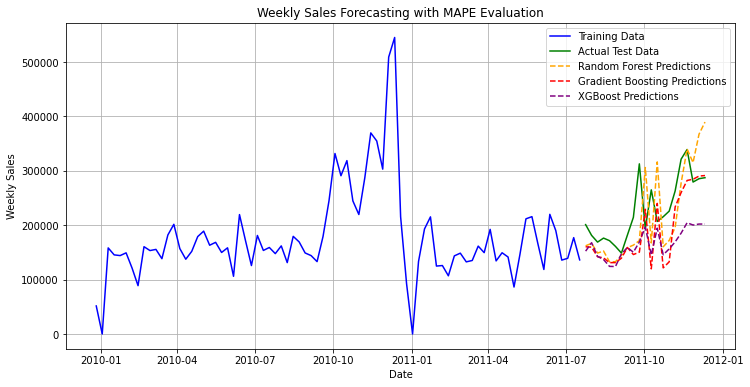

In [52]:
# 1. Load the Original Data
file_path = "filtered_6_months(use later).csv"
df = pd.read_csv(file_path)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)

# Filter out invalid Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['sales'] = df['Quantity'] * df['Price']

# 2. Aggregate sales by month
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('W').sum(numeric_only=True).reset_index()

# 3. Feature Engineering
monthly_sales['year'] = monthly_sales['InvoiceDate'].dt.year
monthly_sales['month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales['time_index'] = np.arange(len(monthly_sales))  # Time index for time-based analysis

# Generate Lag Features and Rolling Statistics
monthly_sales['sales_lag1'] = monthly_sales['sales'].shift(1)
monthly_sales['sales_lag2'] = monthly_sales['sales'].shift(2)
monthly_sales['rolling_mean_3'] = monthly_sales['sales'].rolling(window=3).mean().shift(1)
monthly_sales['rolling_std_3'] = monthly_sales['sales'].rolling(window=3).std().shift(1)

# Log Transformation
monthly_sales['log_sales'] = np.log1p(monthly_sales['sales'])  # log(1 + sales)

# Drop rows with NaN values introduced by lag features and rolling statistics
monthly_sales.dropna(inplace=True)

# 4. Prepare Data for Training
features = ['time_index', 'year', 'month', 'sales_lag1', 'sales_lag2', 'rolling_mean_3', 'rolling_std_3']
X = monthly_sales[features]
y = monthly_sales['log_sales']

# Handle missing values
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

# Train/Test Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Train Models
# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions_log = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions_log = gb_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions_log = xgb_model.predict(X_test)

# Convert log predictions back to the original scale
rf_predictions = np.expm1(rf_predictions_log)
gb_predictions = np.expm1(gb_predictions_log)
xgb_predictions = np.expm1(xgb_predictions_log)
y_test_original = np.expm1(y_test)

# 6. Evaluation Metrics (Including MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def forecast_bias(y_true, y_pred):
    return np.sum(y_true - y_pred) / np.sum(y_pred) * 100

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    bias = forecast_bias(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, Bias: {bias:.2f}%")


# 7. Evaluate Models
evaluate_model(y_test_original, rf_predictions, "Random Forest")
evaluate_model(y_test_original, gb_predictions, "Gradient Boosting")
evaluate_model(y_test_original, xgb_predictions, "XGBoost")

# 8. Visualization: Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'].iloc[:train_size], np.expm1(y_train), label="Training Data", color="blue")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], y_test_original, label="Actual Test Data", color="green")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], rf_predictions, label="Random Forest Predictions", color="orange", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], gb_predictions, label="Gradient Boosting Predictions", color="red", linestyle="dashed")
plt.plot(monthly_sales['InvoiceDate'].iloc[train_size:], xgb_predictions, label="XGBoost Predictions", color="purple", linestyle="dashed")
plt.legend()
plt.title("Weekly Sales Forecasting with MAPE Evaluation")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
output_file = "weekly_sales_forecast.png"
plt.savefig(
    output_file,
    dpi=300,
    bbox_inches='tight',
    transparent=False,  # Ensures background is not transparent
    facecolor='white',  # Set background color explicitly
    edgecolor='white'   # Set edge color explicitly
)
plt.show()
